In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk(r'C:\Users\kushn\Downloads\Files\coffee_sales.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
coffee_data = pd.read_csv(r'C:\Users\kushn\Downloads\Files\coffee_sales.csv')
coffee_data.head(1133)

,date,datetime,cash_type,card,money,coffee_name
0,01-03-2024,15:50.5,card,ANON-0000-0000-0001,38.70,Latte
1,01-03-2024,19:22.5,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,01-03-2024,20:18.1,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,01-03-2024,46:33.0,card,ANON-0000-0000-0003,28.90,Americano
4,01-03-2024,48:14.6,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,31-07-2024,53:35.1,card,ANON-0000-0000-0443,23.02,Cortado
1129,31-07-2024,59:25.0,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,31-07-2024,26:26.0,card,ANON-0000-0000-0444,32.82,Latte
1131,31-07-2024,54:11.8,card,ANON-0000-0000-0445,32.82,Latte


In [3]:
coffee_data.shape

(1133, 6)

In [4]:
coffee_data.head()


,date,datetime,cash_type,card,money,coffee_name
0,01-03-2024,15:50.5,card,ANON-0000-0000-0001,38.7,Latte
1,01-03-2024,19:22.5,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,01-03-2024,20:18.1,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,01-03-2024,46:33.0,card,ANON-0000-0000-0003,28.9,Americano
4,01-03-2024,48:14.6,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [6]:
coffee_data.duplicated().sum()

np.int64(0)

In [7]:
coffee_data.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


In [8]:
coffee_data.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


In [9]:
cash_types=coffee_data.cash_type.value_counts()
print(cash_types)
print("-"*25)
coffee_types=coffee_data.coffee_name.value_counts()
print(coffee_types)

cash_type
card    1044
cash      89
Name: count, dtype: int64
-------------------------
coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64


<Axes: >

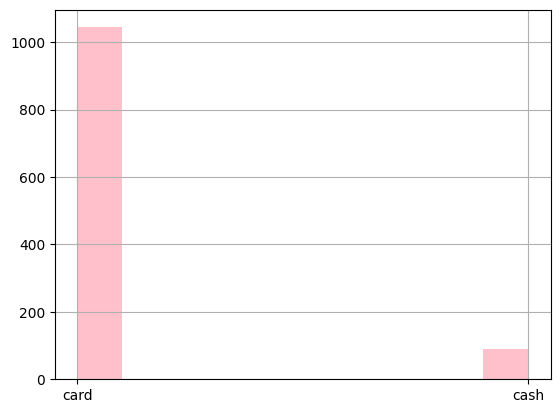

In [10]:
coffee_data['cash_type'].hist()
coffee_data['cash_type'].hist(color='pink')

In [11]:
coffee_data['cash_type'].value_counts(normalize=True)

cash_type
card    0.921447
cash    0.078553
Name: proportion, dtype: float64

In [12]:
pd.DataFrame(coffee_data['coffee_name'].value_counts(normalize=True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


In [13]:
coffee_data['date'] = pd.to_datetime(coffee_data['date'], dayfirst=True)
coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'], dayfirst=True, errors='coerce')

coffee_data['month'] = coffee_data['date'].dt.strftime('%Y-%m')
coffee_data['day'] = coffee_data['date'].dt.strftime('%w')
coffee_data['hour'] = coffee_data['datetime'].dt.strftime('%H')

In [14]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     479 non-null    datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         479 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


In [15]:
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-09-27 15:50:30,card,ANON-0000-0000-0001,38.7,Latte,2024-03,5,15
1,2024-03-01,2024-09-27 19:22:30,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,19
2,2024-03-01,2024-09-27 20:18:06,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,20
3,2024-03-01,NaT,card,ANON-0000-0000-0003,28.9,Americano,2024-03,5,NaN
4,2024-03-01,NaT,card,ANON-0000-0000-0004,38.7,Latte,2024-03,5,NaN


In [16]:
coffee_data.describe().T

,count,mean,min,25%,50%,75%,max,std
date,1133,2024-05-19 11:36:29.232127232,2024-03-01 00:00:00,2024-04-14 00:00:00,2024-05-23 00:00:00,2024-06-22 00:00:00,2024-07-31 00:00:00,NaN
datetime,479,2024-09-27 12:52:32.943632384,2024-09-27 00:00:12,2024-09-27 06:45:18,2024-09-27 13:37:54,2024-09-27 18:44:33,2024-09-27 23:59:18,NaN
money,1133.0,33.105808,18.12,28.9,32.82,37.72,40.0,5.035366


In [17]:
[coffee_data['date'].min(),coffee_data['date'].max()]

[Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00')]

In [18]:
revenue_data =coffee_data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)

Text(0.5, 0, 'Revenue')

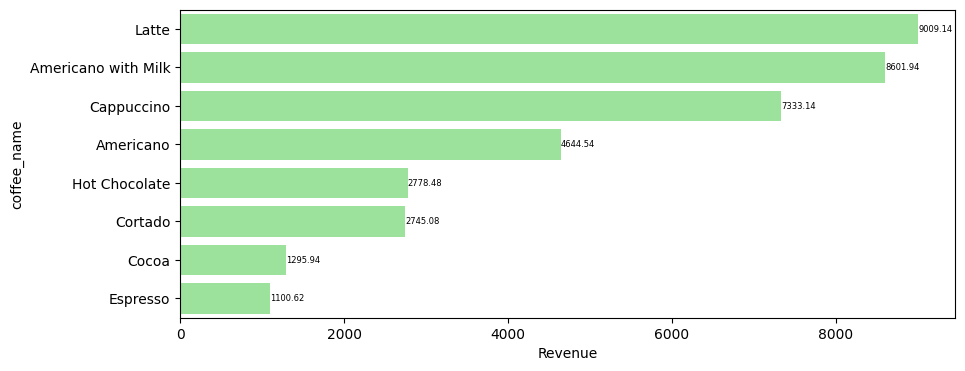

In [19]:
plt.figure(figsize=(10,4))
ax = sns.barplot(data=revenue_data,x='money',y='coffee_name',color='lightgreen')
ax.bar_label(ax.containers[0], fontsize=6)
plt.xlabel('Revenue')

In [20]:
monthly_sales =coffee_data.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03,36,34,20,6,30,10,22,48
1,2024-04,35,42,43,6,19,7,13,31
2,2024-05,48,58,55,9,17,8,14,58
3,2024-06,14,69,46,5,19,10,14,50
4,2024-07,36,65,32,9,14,14,11,56


In [21]:
monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


([<matplotlib.axis.XTick at 0x11825097110>,
 [Text(0, 0, '2024-03'),
  Text(1, 0, '2024-04'),
  Text(2, 0, '2024-05'),
  Text(3, 0, '2024-06'),
  Text(4, 0, '2024-07')])

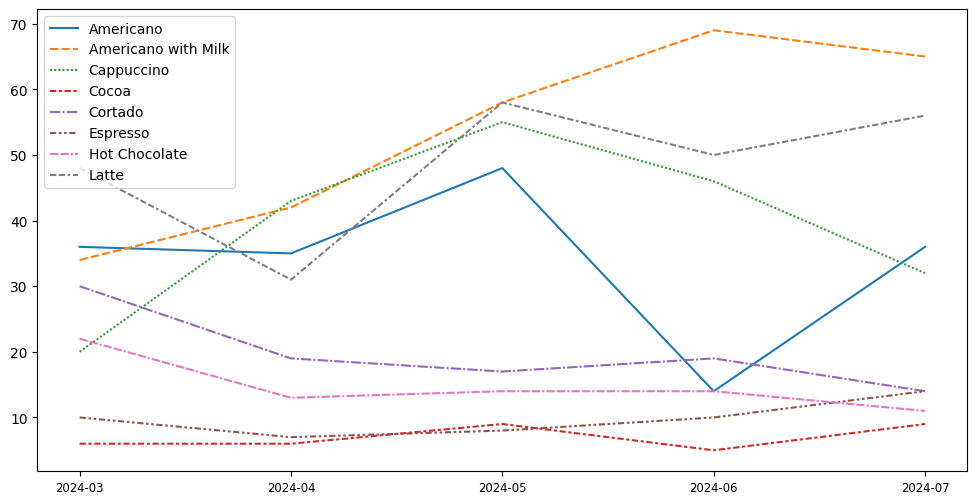

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')

In [23]:
weekday_sales =coffee_data.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


([<matplotlib.axis.XTick at 0x1180fe74200>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thur'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

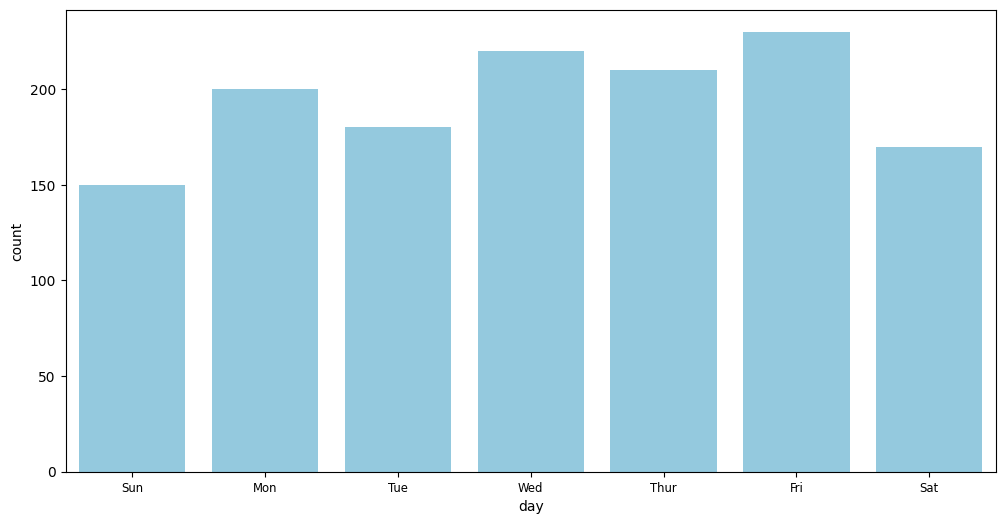

In [24]:
data = {
    'day': [0, 1, 2, 3, 4, 5, 6],
    'count': [150, 200, 180, 220, 210, 230, 170]
}
weekday_sales = pd.DataFrame(data)
plt.figure(figsize=(12,6))
sns.barplot(data=weekday_sales,x='day',y='count',color='skyblue')
plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')

In [25]:
daily_sales =coffee_data.groupby(['coffee_name','date']).count()['datetime'].reset_index().reset_index().rename(columns={'datetime':'count'}).pivot(index='date',columns='coffee_name',values='count').reset_index().fillna(0)
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0
1,2024-03-02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-03-03,0.0,2.0,0.0,1.0,1.0,0.0,2.0,1.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2024-03-05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
148,2024-07-30,2.0,6.0,2.0,0.0,3.0,1.0,0.0,2.0


In [26]:
daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,0.0,3.0
Americano with Milk,0.0,6.0
Cappuccino,0.0,6.0
Cocoa,0.0,1.0
Cortado,0.0,3.0
Espresso,0.0,2.0
Hot Chocolate,0.0,3.0
Latte,0.0,4.0


In [27]:
hourly_sales =coffee_data.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales

,hour,count
0,00,13
1,01,17
2,02,19
3,03,20
4,04,22
5,05,17
6,06,19
7,07,15
8,08,10
9,09,19


<Axes: xlabel='hour', ylabel='count'>

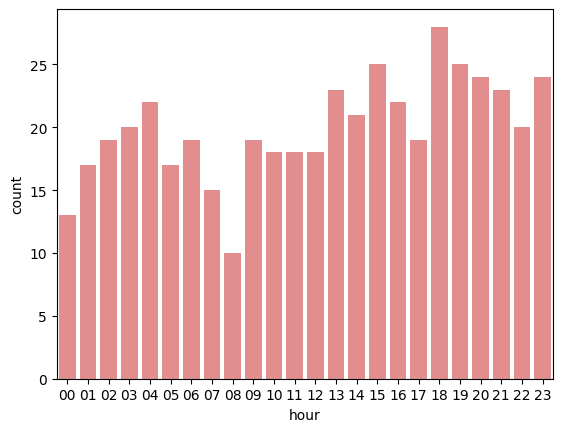

In [28]:
sns.barplot(data=hourly_sales,x='hour',y='count',color='lightcoral')

In [29]:
hourly_sales_by_coffee =coffee_data.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',columns='coffee_name',values='count').fillna(0).reset_index()
hourly_sales_by_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,00,2.0,1.0,2.0,0.0,2.0,1.0,1.0,4.0
1,01,6.0,0.0,4.0,0.0,0.0,0.0,4.0,3.0
2,02,2.0,5.0,4.0,0.0,1.0,0.0,0.0,7.0
3,03,4.0,4.0,2.0,0.0,3.0,0.0,1.0,6.0
4,04,2.0,6.0,3.0,0.0,4.0,1.0,2.0,4.0
5,05,3.0,5.0,3.0,0.0,1.0,2.0,2.0,1.0
6,06,0.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0
7,07,3.0,2.0,0.0,1.0,1.0,3.0,2.0,3.0
8,08,1.0,3.0,0.0,0.0,3.0,0.0,1.0,2.0
9,09,4.0,4.0,3.0,1.0,0.0,0.0,2.0,5.0


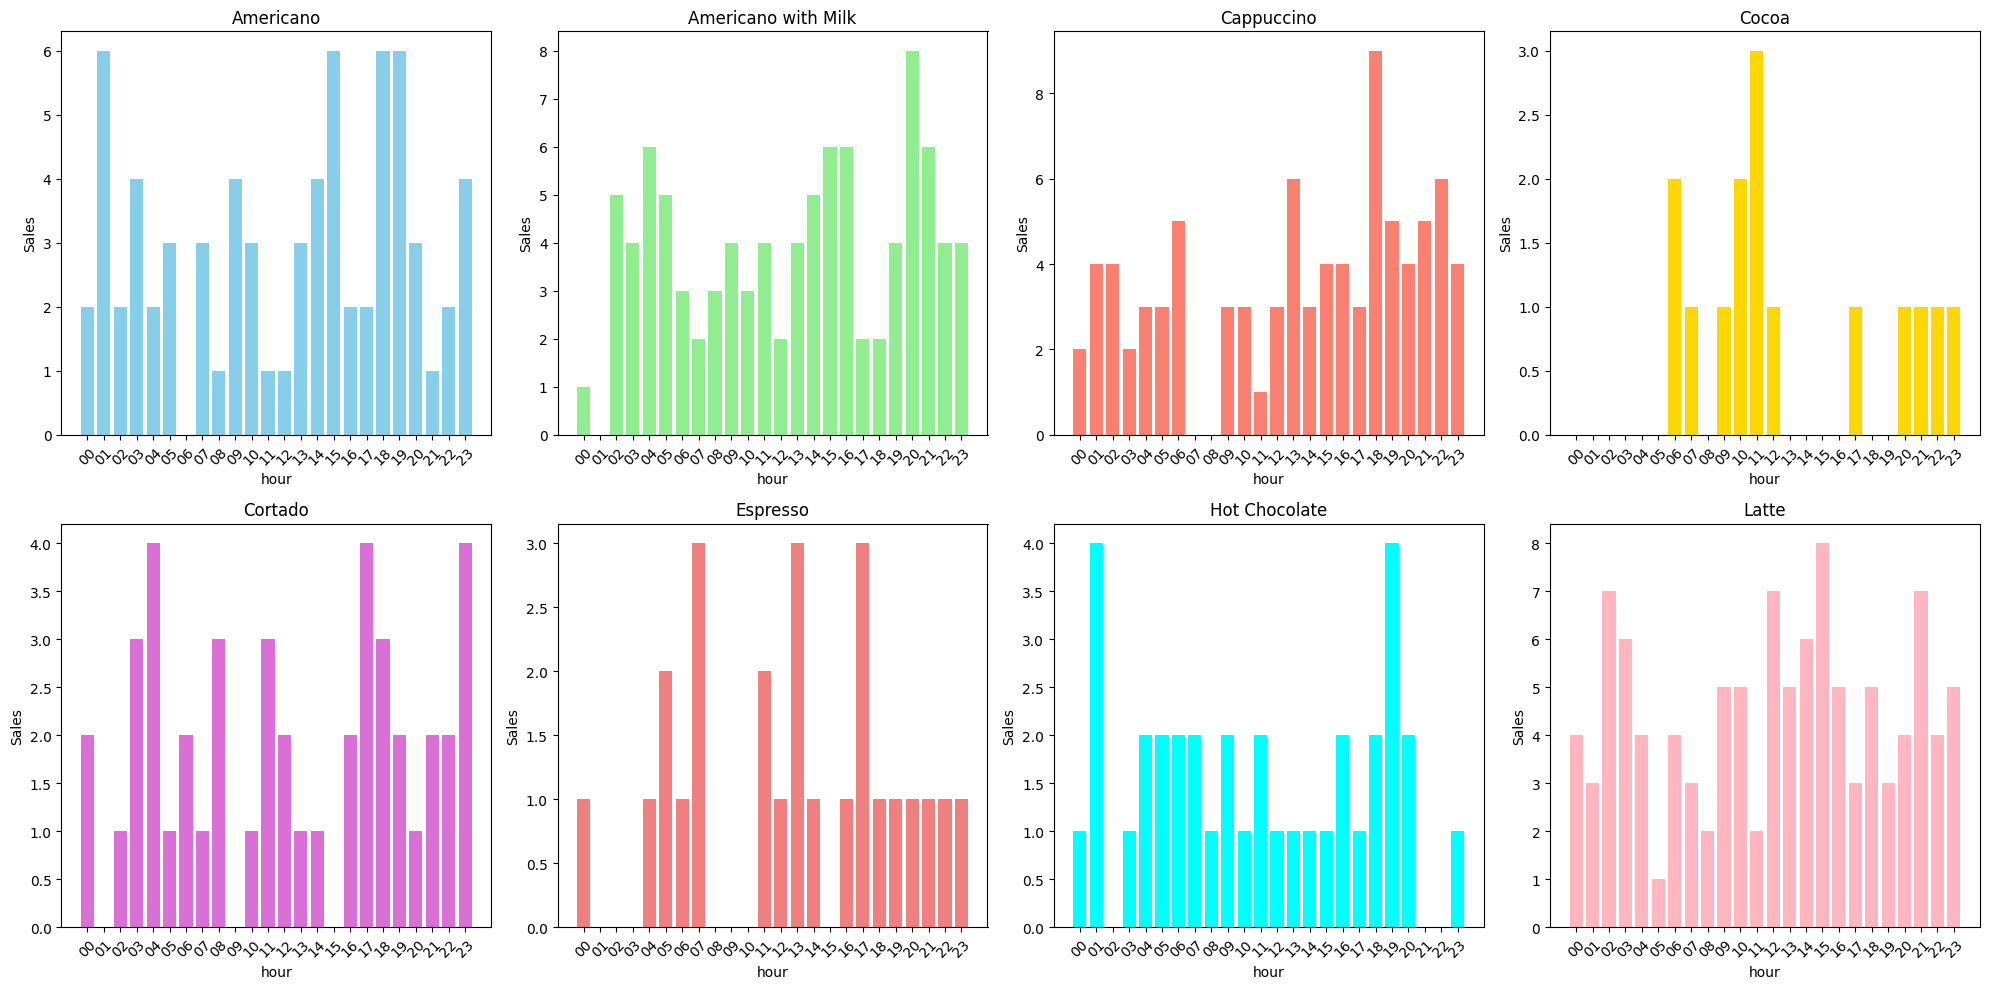

In [30]:
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'orchid', 'lightcoral', 'cyan', 'lightpink']
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, column in enumerate(hourly_sales_by_coffee.columns[1:]): 
    axs[i].bar(hourly_sales_by_coffee['hour'], hourly_sales_by_coffee[column], color=colors[i % len(colors)])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('hour')
    axs[i].set_ylabel('Sales')
    axs[i].tick_params(axis='x', rotation=45)
   
    
plt.tight_layout()

plt.show()